In [1]:
### PROGRAMA DE ASISTENCIA AL DISEÑO DE CONVERTIDOR DAB ###

# Autor: Magnelli, Tomás Vicente.
# Contexto: PROYECTO INTEGRADOR PARA LA OBTENCIÓN DEL TÍTULO DE GRADO
# INGENIERO ELECTRÓNICO
# Titulo del proyecto: “CONTROL DE POTENCIA DE UN CONVERTIDOR AISLADO 
# MODULAR DE TOPOLOGÍA DOBLE PUENTE ACTIVO”.
#  
# Director de Proyecto Integrador: Esp. Ing. Adrián Claudio Agüero
# Universidad Nacional de Cordoba.
# Facultad de Ciencias Exactas, Fisicas y Naturales.
# Programa de autoría propia y específica para el Proyecto Integrador. 

# Este programa permite ejecutar diferentes códigos de Python con el objetivo
# de facilitar al diseñador la determinación de los diferentes puntos de
# funcionamiento del convertidor. También sirve para complementar el proceso
# de aprendizaje a un operador del prototipo armado.
#
# Funciones programadas que ejecuta este código.
import CalcularCtes     # 1)
import LimitesZVS       # 2)
import SalidaVariable   # 3)
import CalcularVo       # 4)
import Parametricas     # 5)


In [2]:
# 1) CalcularCtes.py : Es una pieza fundamental de la plataforma, ya que ejecuta 
# el procedimiento de cálculo completo del Capítulo 3 del Informe del Proyecto 
# Integrador. En su interior, dos funciones con el mismo procedimiento numérico
# pero una diferencia fundamental. La primera función, calcular() realiza 
# impresiones de pantalla de cada valor intermedio del procedimiento.
# Por el contrario, la función calcSinPrint() retorna valores clave que serán
# utilizados por la función SalidaVariable.py.
Vi = 110    #Tensión de entrada.
Vo = 200    #Tensión de salida.
n=1         #Relación de transformador de alta frecuencia HFT.
D = 0.4     #Desfase proporcional entre puentes (adimensional).
L=45e-6     #Inductancia equivalente total de perdidas (Lcomp+Lper del HFT).
fs=33.25e3  #Frecuencia de conmutacion de llaves electronicas MOSFET.
CalcularCtes.calcular(Vi,Vo,n,D,L,fs) 

**********************************************************************
*************** PROCEDIMIENTO DE CÁLCULO DE CORRIENTES ***************
**********************************************************************
********************** Parámetros de entrada: ************************
Tensión de entrada:                   Vi =  110  [V]
Tensión de salida:                    Vo =  200  [V]
Relación de transformación:           n =  1
Desfase entre puentes en radianes:    phi =  1.26 rad
Desfase proporcional entre puentes:   D =  0.4
Inductancia equivalente total:        L =  45.0 [uHy]
Frecuencia de conmutación:            fs =  33.25 [kHz]

*** Intervalos de tiempo y variaciones de corriente en inductor: *****
     (dt1 = dt3 = D*Ts)  ;  (dt2 = dt4 = (1-D)*Ts)      
Duración de intervalo        [0:phi]: dt1 =  6.02  [us]
Duración de intervalo       [phi:PI]: dt2 =  9.02  [us]
Duración de intervalo    [PI:PI+phi]: dt3 =  6.02  [us]
Duración de intervalo  [PI+phi:2*PI]: dt4 =  9.02  [us]
 

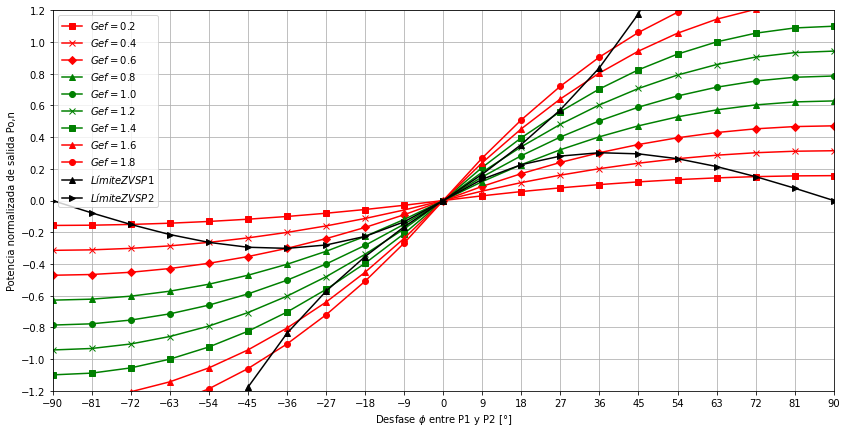

In [3]:
# 2) LimitesZVS.py : Ésta función realiza el gráfico paramétrico normalizado
# de Potencia de Salida en función del desplazamiento phi entre puentes 
# que se incorpora al informe al final del Capítulo 3. Se incorporan límites ZVS
# a la gráfica que se obtuvo, la cual fue incorporada al comienzo del Capítulo 4.
# A diferencia de las funciones SalidaVariable.py y Parametricas.py, en este 
# código se ha ingresado directamente la ecuación de potencia normalizada
# obtenida en el Capítulo 3, sin utilizar otras funciones auxiliares.
LimitesZVS.graficarLimitesZVS()

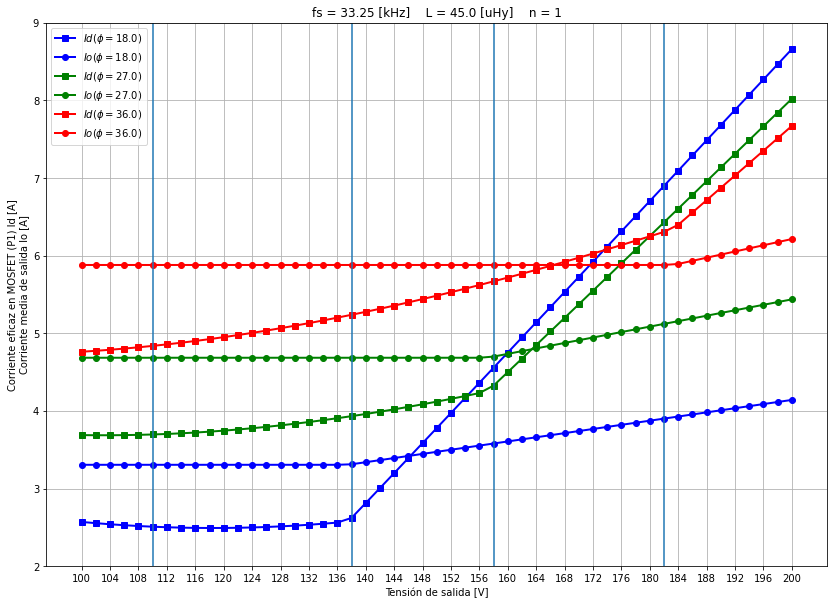

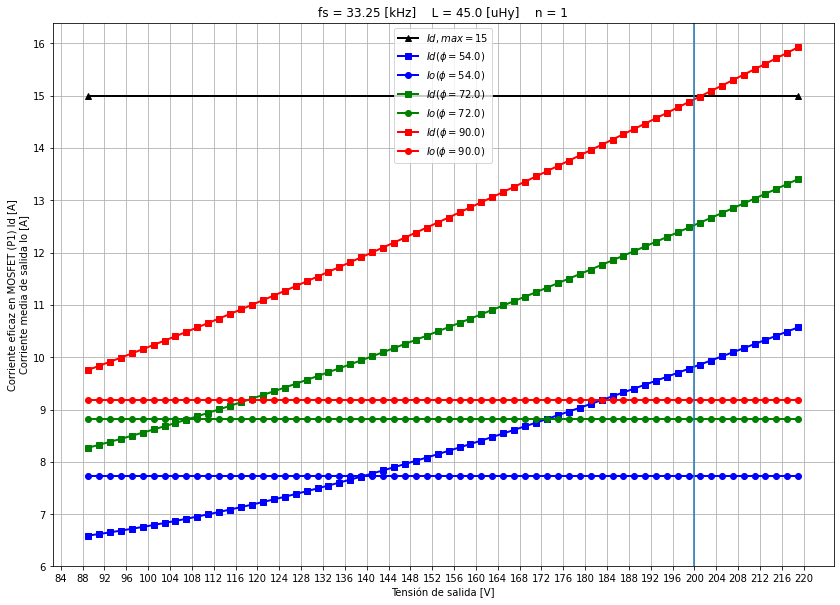

In [4]:
# 3) SalidaVariable.py : Iterando la ejecución de la función CalcularCtes.py, 
# esta función traza y gráfica curvas paramétricas de la corriente media de 
# salida y de la corriente eficaz en los mosfets del puente P1 (que coincide con
# P2 cuando n=1). Las diferentes paramétricas son para diferentes valores de 
# desplazamiento phi entre puentes. Se puede utilizar esta función en dos modos. 
# MODO = 1 : Se hace foco en algunas de las paramétricas de menor consumo, con
# phi={18°;27°;36°} donde es posible apreciar la perdida de la condición ZVS al
# incrementarse la corriente eficaz en los mosfet sustancialmente respecto de la
# corriente media. Observar en este modo las líneas verticales coinciden con los
# cruces por fuera de los límites ZVS del gráfico generado por LimitesZVS.py.
# MODO = 2 : Este modo focaliza sobre las curvas paramétricas de mayor consumo, 
# con valores de desfase phi={54°;72°;90°}. La idea es permitir al diseñador 
# ingresar los valores de corriente eficaz y tensión máxima repetitiva a los 
# que pueden ser sometidos los MOSFET del convertidor (Siempre considerando n=1).
# Luego, al variar los parámetros L y fs el diseñador podrá encontrar la 
# especificación de máxima corriente media de salida dada la condición de 
# corriente más exigente para los transistores. El modo 2 ayuda a responder la
# pregunta: ¿Cuál es la máxima corriente de salida que puedo obtener, dado un
# conjunto de parámetros y las características de los transistores a disposición?
Vi=110      #Máxima tensión de entrada.
n=1         #Relación de transformador de alta frecuencia HFT.
L=45e-6     #Inductancia suma entre perdidas del HFT e inductor complementario.
fs=33.25e3  #Frecuencia de conmutación de llaves electrónicas MOSFET.
Id_max=15   #Máxima corriente admisible Id,max en cada MOSFET.
Vo_max=200  #Máxima tensión admisible de salida Vo,max.
MODO = 1    #MODO=1 para mostrar curvas con limites ZVS Gef = (1.2 ; 1.4 ; 1.6).
#MODO = 2    #MODO=2 para mostrar curvas de máxima corriente y tensión.
if(MODO==1):
    Vo_inf = 100    #Limite inferior de tensión a graficar. (Vo_inf>0.8*Vi)
    Vo_sup = 200    #Limite superior de tensión a graficar. (Vo_sup<2*Vi)
elif(MODO==2):
    Vo_inf = 89     #Limite inferior de tensión a graficar. (Vo_inf>0.8*Vi)
    Vo_sup = 219    #Limite superior de tensión a graficar. (Vo_sup<2*Vi)
SalidaVariable.graficarCorriente(Vi,Vo_inf,Vo_sup,n,L,fs,Id_max,Vo_max,MODO)
MODO=2
Vo_inf = 89     #Limite inferior de tensión a graficar. (Vo_inf>0.8*Vi)
Vo_sup = 219    #Limite superior de tensión a graficar. (Vo_sup<2*Vi)
SalidaVariable.graficarCorriente(Vi,Vo_inf,Vo_sup,n,L,fs,Id_max,Vo_max,MODO)

In [5]:
# 4)CalcularVo.py : A diferencia del código de CalcularCtes.py, esta función no 
# toma como parámetro la tensión de salida, sino que se calcula directamente con
# la expresión de corriente media de salida. Si bien este código no realiza todo 
# el procedimiento de cálculo de corrientes intermedias, el resultado de la 
# corriente media será el mismo que se obtiene con el código CalcularCtes.py. 
# Éste código también sirve como verificación de la expresión final de corriente
# media hallada mediante el despeje de las expresiones integrales desarrolladas 
# en el Capítulo 3 del Marco Teórico. Al multiplicar por la resistencia de carga
# se obtiene la tensión media de salida del convertidor, para un determinado 
# punto de funcionamiento. También dentro de esta función hay una que solo 
# imprime valores y otra que retorna un valor, que en este caso es utilizado por
# la función Parametricas.py.
Vi=24       #Máxima tensión de entrada.
n=1         #Relación de transformador de alta frecuencia HFT.
D = 0.2     #Desfase proporcional entre puentes (adimensional).
L=210e-6     #Inductancia suma entre perdidas del HFT e inductor complementario.
fs=16e3  #Frecuencia de conmutacion de llaves electronicas MOSFET.
Rl=40       #Resistencia de carga en ohms.
CalcularVo.calcular(Vi,n,D,L,fs,Rl)


Corriente media de salida del convertidor:   Iav_out =  0.57  [A]

Tensión media de salida del convertidor:   Vav_out =  22.86  [V]


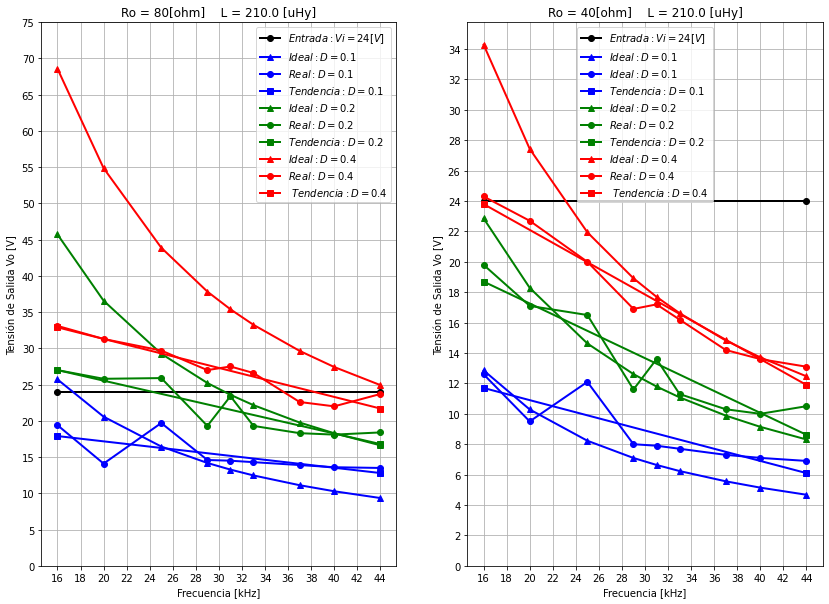

In [6]:
# 5)Parametricas.py : Al ejecutar en forma iterativa la función CalcularVo.py,
# este código permite graficar las predicciones teóricas de tensión de salida
# para diferentes valores de carga, haciendo uso de la expresión de corriente 
# media de salida. Además, en el interior del código Parametricas.py se 
# encuentran ingresados uno a uno los datos experimentales obtenidos mediante
# la medición de voltaje de salida con Multimetro UT136C+ en medición de 
# tensión continua. Se incorporan líneas de tendencia de cada uno de los 
# gráficos, que provienen de evaluar en dos puntos extremos las rectas 
# lineales de tendencia.
Vi=24       #Tensión nominal de entrada.
n=1         #Relación de transformador de alta frecuencia HFT.
L=210e-6    #Inductancia suma entre perdidas del HFT e inductor complementario.
Rl1=80      #Carga resistiva de 80ohm (Estufa de cuarzo - 1 vela).
Rl2=40      #Carga resistiva de 40ohm (Estufa de cuarzo - 2 velas).
#Datos de mediciones ingresados dentro de la función generarParametricas().
Parametricas.generarParametricas(Vi,n,L,Rl1,Rl2)